## Final Project Submission

Please fill out:
* Student name: Kayli Leung and Alec Morgan
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
house_data = pd.read_csv('kc_house_data.csv')
house_data.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,NaN,0,0,0,0
view,0,0,0,0,0


In [3]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.129599
floors           0.256804
waterfront       0.276295
lat              0.306692
bedrooms         0.308787
view             0.395734
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

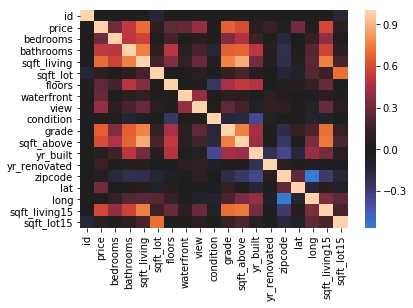

In [4]:
sns.heatmap(house_data.corr(), center=0)
house_data.corr()['price'].sort_values() #price is our target variable

The square foot of living has the greatest value of correlation so we will start by running a simple linear regression with squarefoot of living.

In [32]:
y = np.array(house_data['price'])
x = np.array(house_data['sqft_living'])

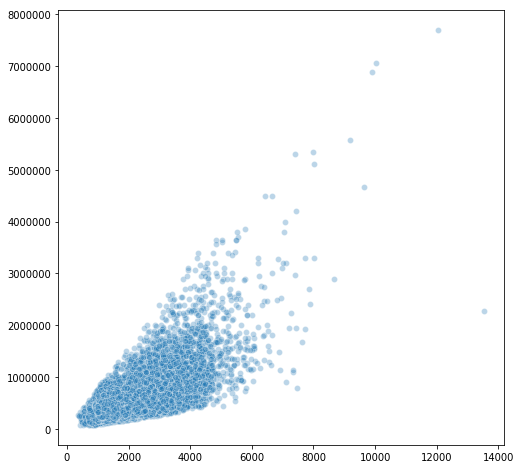

In [33]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x, y, alpha=0.3)

In [34]:
f = "y~x"
model = ols(formula=f, data=house_data).fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:45:49   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
x            280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

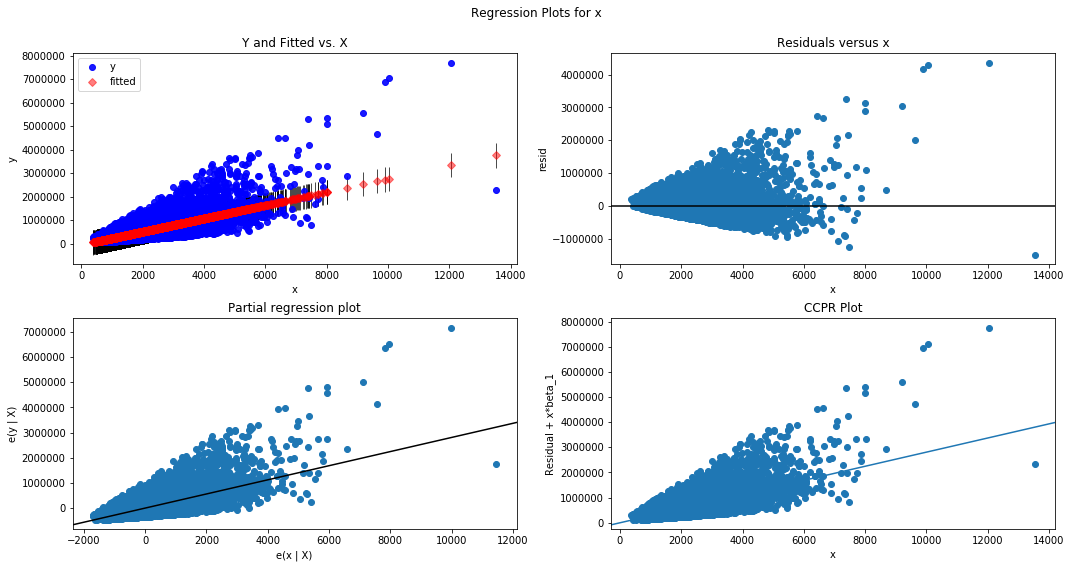

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'x', fig=fig)
plt.show()

Looking at the second plot in the first row, the residuals are plotted in a cone shape which is an indicator of heteroscedasticity. When making linear regression models we are assuming homoscedasticity so we may want to transform sqft_living.

In [37]:
print(house_data['sqft_living'].describe(), house_data['price'].describe(), sep='\n')

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64
count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


/Users/kaylischulz/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


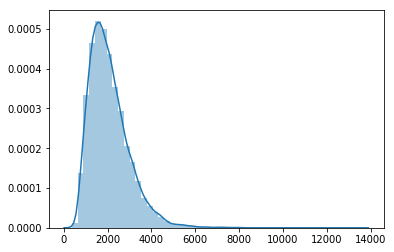

In [38]:
sns.distplot(x)

In [12]:
# squarefoot living is positively skewed and has no null (0) values that we want to fix

In [39]:
linreg = LinearRegression()

In [40]:
linreg.fit(x.reshape(-1, 1), y.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
y_hat = linreg.predict(x.reshape(-1,1))

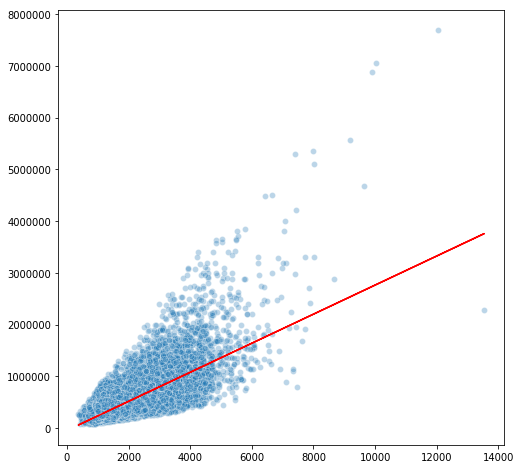

In [42]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x, y, alpha=0.3)
plt.plot(x, y_hat, color='red')
plt.show()

The linear regression is not a great fit once the sqft_living increases. The outliers are affecting the model.

In [53]:
# transform sqft_living to see if we can get a better model
log_sqft_living = np.array(np.log(house_data['sqft_living']))
type(log_sqft_living)

numpy.ndarray

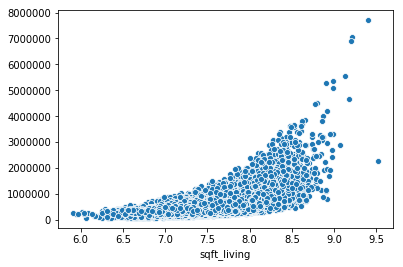

In [20]:
sns.scatterplot(log_sqft_living, y)

In [54]:
# create a model for transformed sqft_living
log_f = 'y~log_sqft_living'
model_log = ols(formula=log_f, data=house_data).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                 1.292e+04
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:53:55   Log-Likelihood:            -3.0233e+05
No. Observations:               21597   AIC:                         6.047e+05
Df Residuals:                   21595   BIC:                         6.047e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.461e+06   3.53e+04    -98.165      0.000   -3.53e+06   -3.39e+06
log_sqft_living  5.299e+05   4661.551    113.670      0.000    5.21e+05    5.39e+05
==============================================================================
Omnibus:                    19384.826   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1655521.719
Skew:                           3.977   Prob(JB):                         0.00
Kurtosis:                      45.148   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
linreg_log = LinearRegression()
linreg_log.fit(log_sqft_living.reshape(-1, 1), y.reshape(-1, 1))
y_hat_log = linreg_log.predict(log_sqft_living.reshape(-1,1))

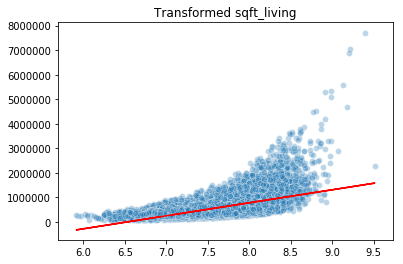

In [57]:
plt.plot(log_sqft_living, y_hat_log, color='red')
plt.title('Transformed sqft_living')
sns.scatterplot(log_sqft_living, y, alpha=0.3)
plt.show()

The logarithmic transformation of squarefoot living does not appear to be as linear as the untransformed data (shown again below). We thought the log would reduce the effect of outliers, but they may have strengthened them. We will stick with the untransformed for now.

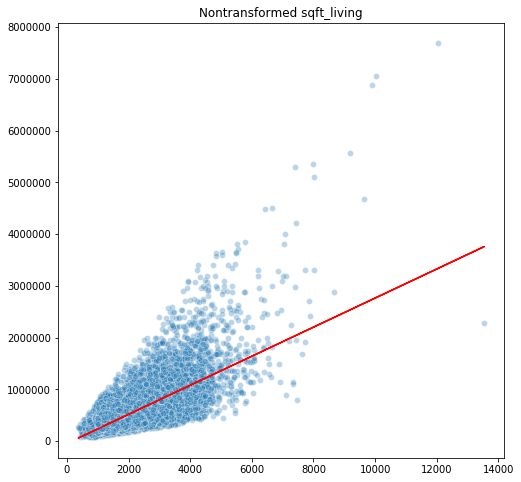

In [58]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x, y, alpha=0.3)
plt.plot(x, y_hat, color='red')
plt.title('Nontransformed sqft_living')
plt.show()

In [59]:
minmax_sqft_liv = (x - min(x)) / (max(x) - min(x))
form_min_max = 'y~minmax_sqft_liv'
model_minmax = ols(formula=form_min_max, data=house_data).fit()
model_minmax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:55:08   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.993e+04   3764.694     15.919      0.000    5.26e+04    6.73e+04
minmax_sqft_liv  3.699e+06   2.55e+04    144.819      0.000    3.65e+06    3.75e+06
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
linreg_minmax = LinearRegression()
linreg_minmax.fit(minmax_sqft_liv.reshape(-1, 1), y.reshape(-1, 1))

y_hat_minmax = linreg_minmax.predict(minmax_sqft_liv.reshape(-1,1))

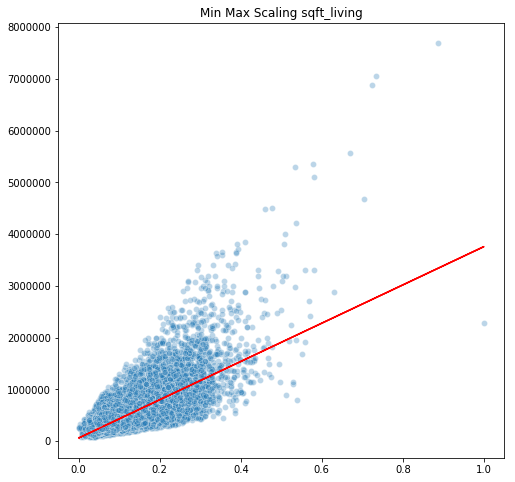

In [61]:
plt.figure(figsize=(8, 8))
sns.scatterplot(minmax_sqft_liv, y, alpha=0.3)
plt.plot(minmax_sqft_liv, y_hat_minmax, color='red')
plt.title('Min Max Scaling sqft_living')
plt.show()

In [67]:
stand_sqft_liv = (x - np.mean(x)) / (np.sqrt(np.var(x)))
form_stand = 'y~stand_sqft_liv'
model_stand = ols(formula=form_stand, data=house_data).fit()
model_stand.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:58:27   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.403e+05   1780.543    303.445      0.000    5.37e+05    5.44e+05
stand_sqft_liv  2.579e+05   1780.543    144.819      0.000    2.54e+05    2.61e+05
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
linreg_stand = LinearRegression()
linreg_stand.fit(stand_sqft_liv.reshape(-1, 1), y.reshape(-1, 1))

y_hat_stand = linreg_stand.predict(stand_sqft_liv.reshape(-1,1))

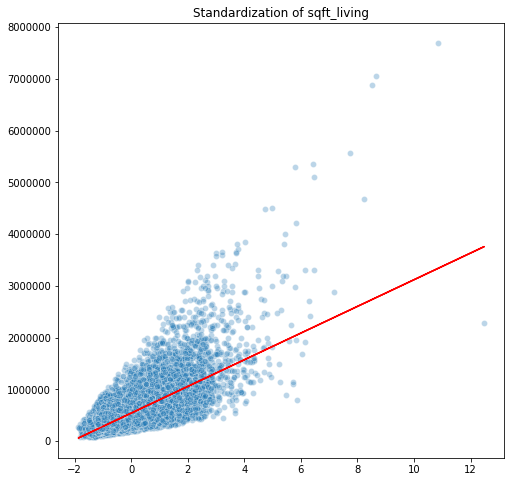

In [70]:
plt.figure(figsize=(8, 8))
sns.scatterplot(stand_sqft_liv, y, alpha=0.3)
plt.plot(stand_sqft_liv, y_hat_stand, color='red')
plt.title('Standardization of sqft_living')
plt.show()